<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/1_newlayer_SVM_DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [ ]:
# Load model for feature extraction
model = DenseNet121(weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
# Function to extract features from an image
def extract_features_Densenet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [ ]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 171ms/step


In [ ]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 164ms/step


In [ ]:

import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training SVM with linear kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[60  0  0  0  0]
 [ 0 60  0  0  0]
 [ 0  0 60  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 60]]
True Negative (TN): 240
False Positive (FP): 0
True Positives (TP): 0
False Negatives (FN): 0
Accuracy: 1.0
Sensitivity (Macro-average recall): 1.0
Precision (Macro-average precision): 1.0
F1 Score (Macro-average F1-score): 1.0

Recall for class 0: 1.0
Specificity for class 0: 1.0

Recall for class 1: 1.

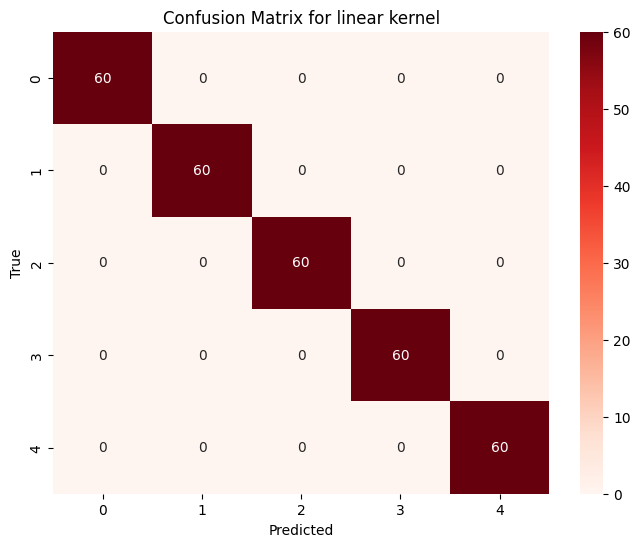

Training SVM with poly kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87        60
           1       0.87      0.87      0.87        60
           2       0.77      0.93      0.84        60
           3       0.98      0.97      0.97        60
           4       1.00      0.97      0.98        60

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

Confusion Matrix:
[[48  5  7  0  0]
 [ 1 52  7  0  0]
 [ 1  2 56  1  0]
 [ 0  1  1 58  0]
 [ 0  0  2  0 58]]
True Negative (TN): 240
False Positive (FP): 0
True Positives (TP): 0
False Negatives (FN): 0
Accuracy: 0.9066666666666666
Sensitivity (Macro-average recall): 0.9066666666666666
Precision (Macro-average precision): 0.9153681603591053
F1 Score (Macro-average F1-score): 0.9078679931951695

Recall for class 0: 

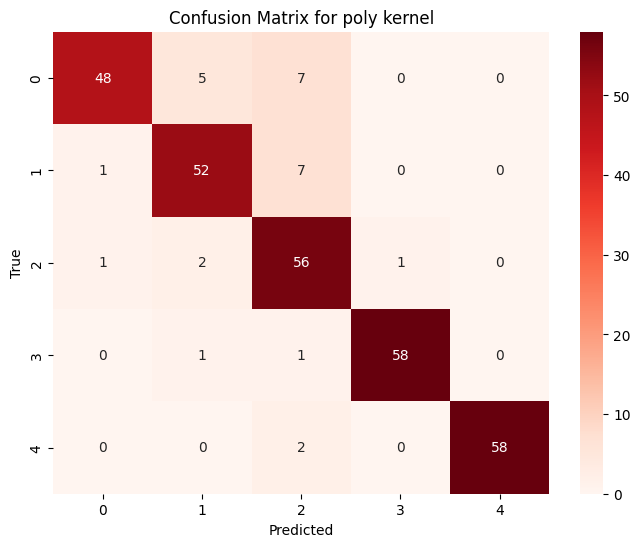

Training SVM with rbf kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        60
           1       0.62      0.78      0.69        60
           2       0.58      0.53      0.56        60
           3       0.87      0.92      0.89        60
           4       0.95      0.88      0.91        60

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300

Confusion Matrix:
[[42  7 10  1  0]
 [ 2 47 11  0  0]
 [ 6 15 32  6  1]
 [ 0  3  0 55  2]
 [ 0  4  2  1 53]]
True Negative (TN): 237
False Positive (FP): 3
True Positives (TP): -3
False Negatives (FN): 3
Accuracy: 0.7633333333333333
Sensitivity (Macro-average recall): 0.7633333333333333
Precision (Macro-average precision): 0.771936735778841
F1 Score (Macro-average F1-score): 0.7638873239785481

Recall for class 0: 0.

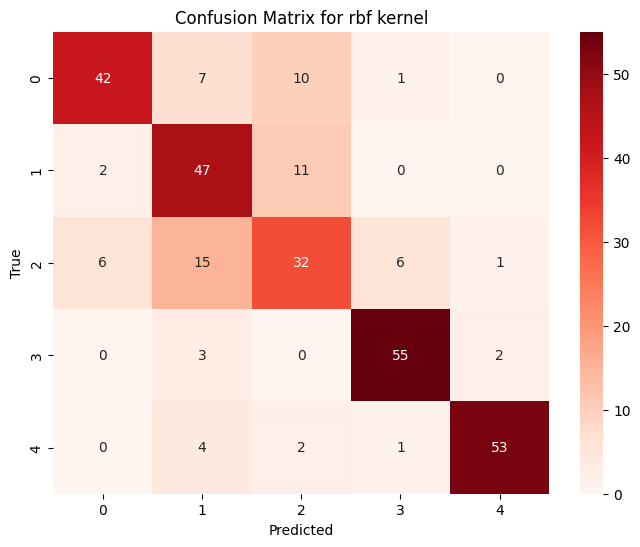

Training SVM with sigmoid kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.64        60
           1       0.51      0.68      0.58        60
           2       0.43      0.33      0.37        60
           3       0.70      0.85      0.77        60
           4       0.87      0.75      0.80        60

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.63       300
weighted avg       0.64      0.64      0.63       300

Confusion Matrix:
[[34  8 13  4  1]
 [ 4 41 14  1  0]
 [ 7 22 20  9  2]
 [ 2  3  0 51  4]
 [ 0  7  0  8 45]]
True Negative (TN): 233
False Positive (FP): 7
True Positives (TP): -7
False Negatives (FN): 7
Accuracy: 0.6366666666666667
Sensitivity (Macro-average recall): 0.6366666666666666
Precision (Macro-average precision): 0.6438247524179711
F1 Score (Macro-average F1-score): 0.6322789599769957

Recall for cl

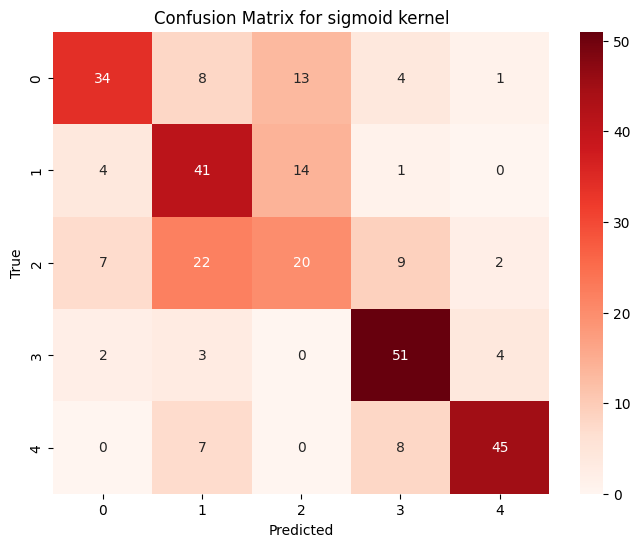

Training SVM with polynomial_exponential kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[60  0  0  0  0]
 [ 0 60  0  0  0]
 [ 0  0 60  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 60]]
True Negative (TN): 240
False Positive (FP): 0
True Positives (TP): 0
False Negatives (FN): 0
Accuracy: 1.0
Sensitivity (Macro-average recall): 1.0
Precision (Macro-average precision): 1.0
F1 Score (Macro-average F1-score): 1.0

Recall for class 0: 1.0
Specificity for clas

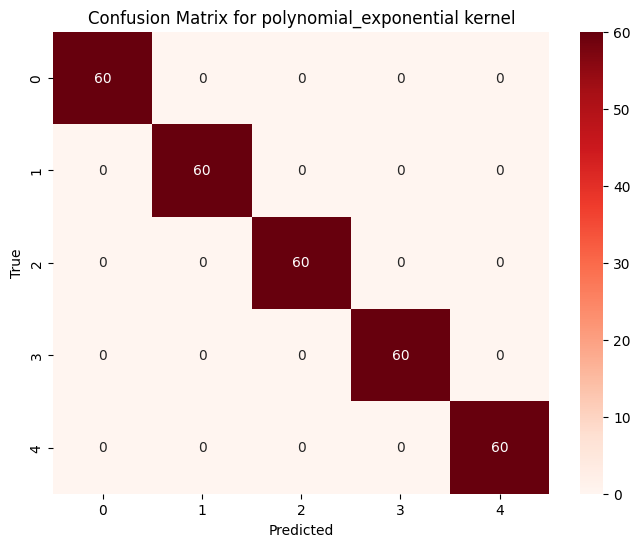

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))  # Classification report with precision, recall, F1-score
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    # Compute recall for each class
    recalls = recall_score(y_test, y_pred, average=None)

    # Compute specificity for each class
    # Specificity = TN / (TN + FP)
    cm = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(cm.shape[0]):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity.append(tn / (tn + fp))

    print('True Negative (TN):', tn)
    print('False Positive (FP):', fp)

        # Total Positive Samples (P)
    p = np.sum(y_test == 1)

        # Calculate True Positives (TP)
    tp = p - fp

        # Calculate False Negatives (FN)
    fn = p - tp

    print("True Positives (TP):", tp)
    print("False Negatives (FN):", fn)

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity (Macro-average recall): {sensitivity}')
    print(f'Precision (Macro-average precision): {precision}')
    print(f'F1 Score (Macro-average F1-score): {f1}\n')

    for i, (recall, specific) in enumerate(zip(recalls, specificity)):
        print(f'Recall for class {i}: {recall}')
        print(f'Specificity for class {i}: {specific}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()


1/1 [==============================] - 4s 4s/step


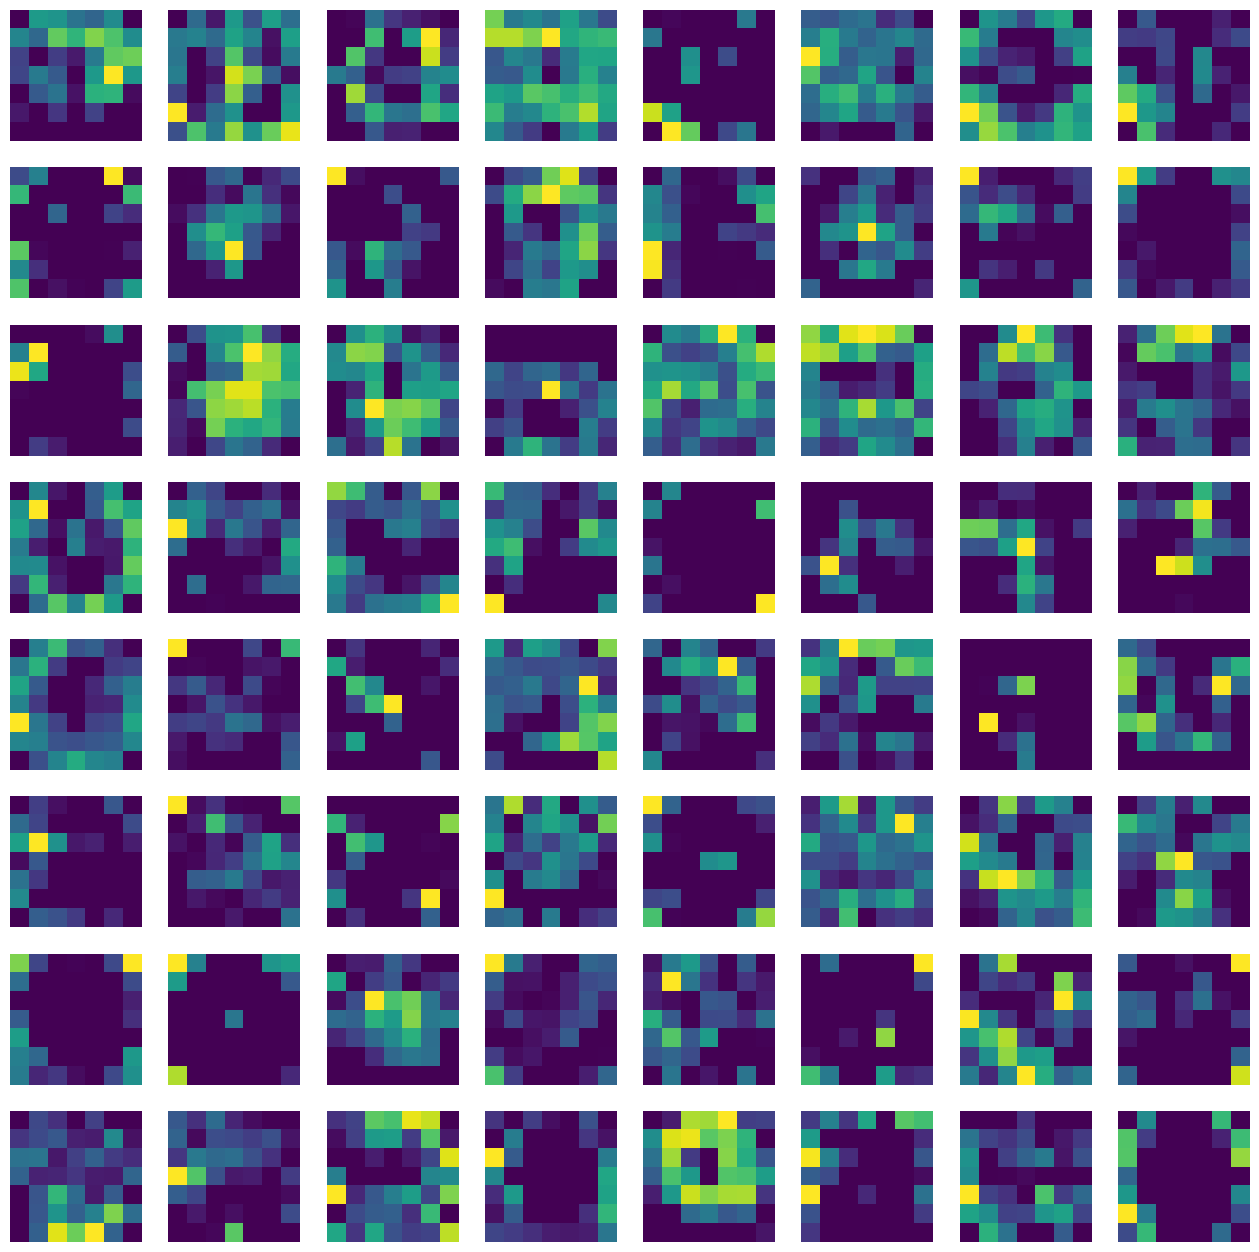

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import DenseNet121
from keras.models import Model
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions

# Load the pre-trained DenseNet121 model
model = DenseNet121(weights='imagenet', include_top=True)

# Choose a layer to extract feature maps from (e.g., the block5_conv3 layer)
layer_name = 'relu'
feature_extractor_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Load and preprocess an example image
img_path = '/content/drive/MyDrive/A/Train/0/10.jpg'  # Change this to your image file path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract features from the example image
features = feature_extractor_model.predict(x)

# Visualize the feature maps
plt.figure(figsize=(16, 16))
num_subplots = min(64, features.shape[-1])  # Limit the number of subplots to 64 or the actual number of features
for i in range(num_subplots):
    plt.subplot(8, 8, i + 1)
    plt.imshow(features[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()


In [ ]:
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
def predict_class(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  X=extract_features_Densenet(filename)
  X=np.array(X)
  X=X.reshape(1,-1)
  output=svm.predict_proba(X)
  print(output)


In [ ]:
!pip install scikit-learn

1/1 [==============================] - 0s 306ms/step


AttributeError: module 'sklearn.svm' has no attribute 'predict_proba'

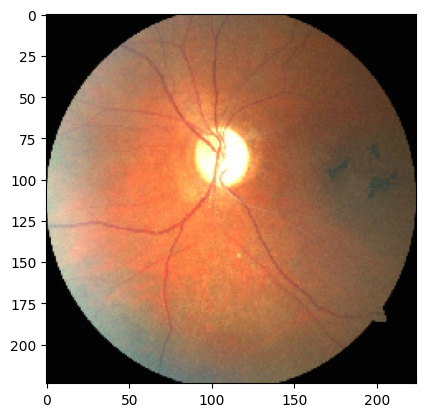

In [ ]:
predict_class("/content/drive/MyDrive/A/Test/0/106.jpg")

Training SVM with LINEAR kernel...
True Positives: 300
True Negatives: 1200
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Precision: 1.0
Specificity: 1.0
Sensitivity: 1.0
F1 Score: 1.0
Recall: 1.0



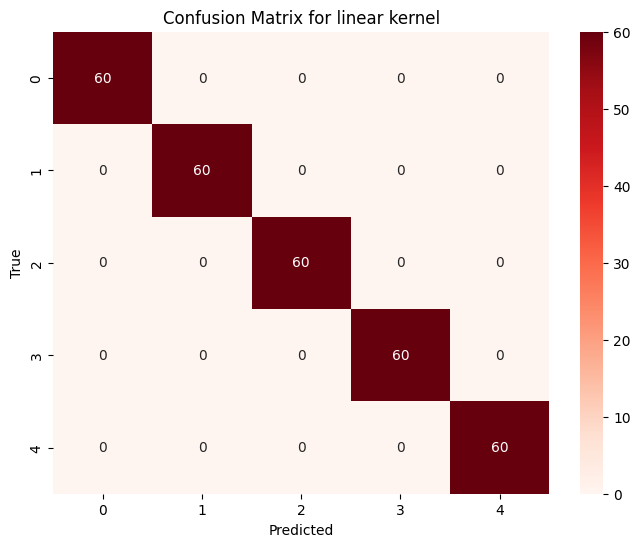

Training SVM with POLY kernel...
True Positives: 272
True Negatives: 1172
False Positives: 28
False Negatives: 28
Accuracy: 0.9626666666666667
Precision: 0.9153681603591053
Specificity: 0.9766666666666667
Sensitivity: 0.9066666666666666
F1 Score: 0.9078679931951695
Recall: 0.9066666666666666



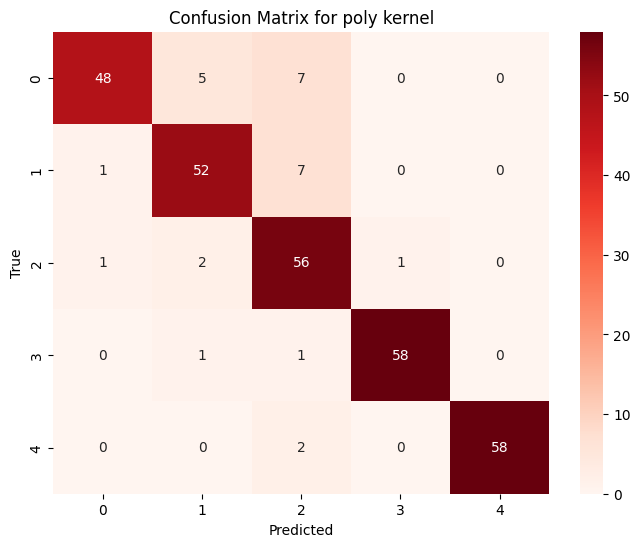

Training SVM with RBF kernel...
True Positives: 229
True Negatives: 1129
False Positives: 71
False Negatives: 71
Accuracy: 0.9053333333333333
Precision: 0.771936735778841
Specificity: 0.9408333333333333
Sensitivity: 0.7633333333333333
F1 Score: 0.7638873239785481
Recall: 0.7633333333333333



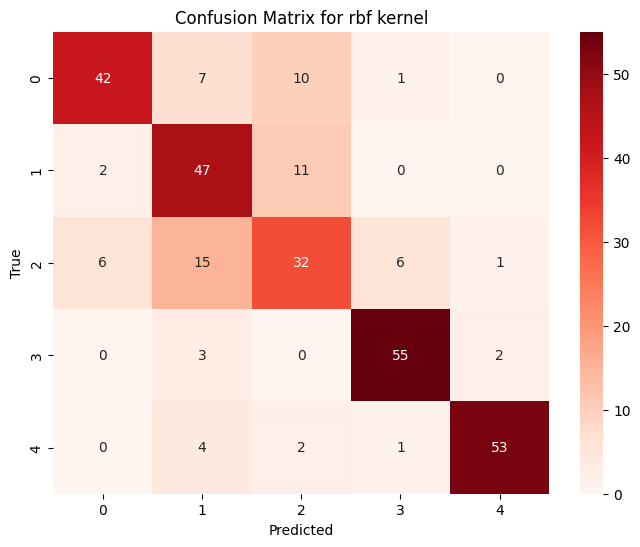

Training SVM with SIGMOID kernel...
True Positives: 191
True Negatives: 1091
False Positives: 109
False Negatives: 109
Accuracy: 0.8546666666666667
Precision: 0.6438247524179711
Specificity: 0.9091666666666667
Sensitivity: 0.6366666666666666
F1 Score: 0.6322789599769957
Recall: 0.6366666666666666



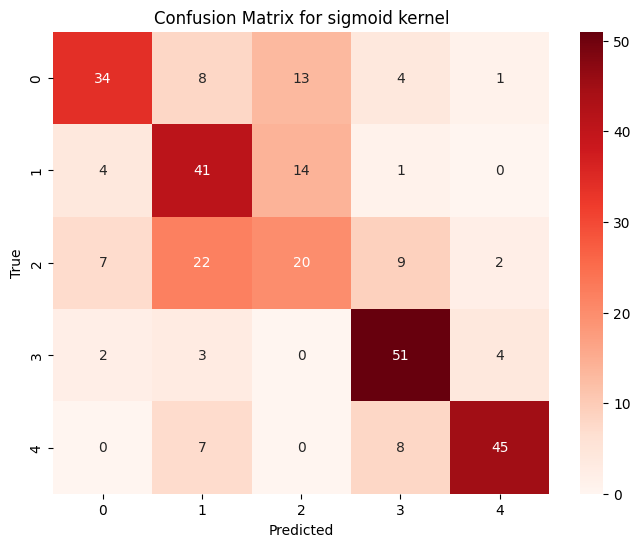

Training SVM with POLYNOMIAL_EXPONENTIAL kernel...
True Positives: 300
True Negatives: 1200
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Precision: 1.0
Specificity: 1.0
Sensitivity: 1.0
F1 Score: 1.0
Recall: 1.0



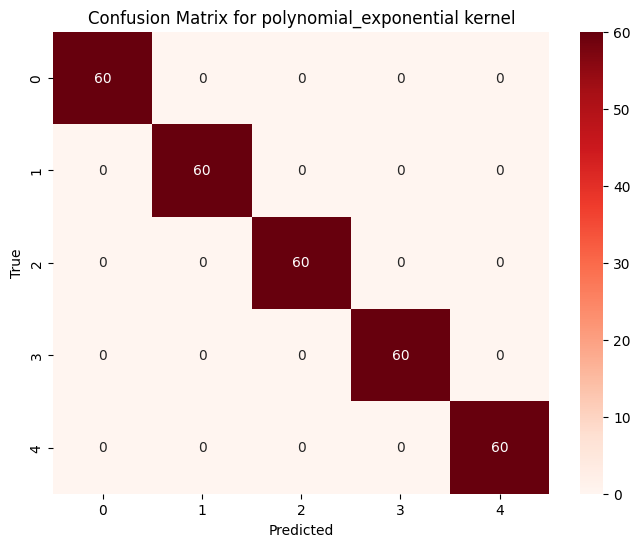

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn import svm, metrics

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel.upper()} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()
